# Analyzing Aviation Accident Data for Risk Assessment

## 1. Defining the Question

#### a) Specifying the Data Analytic Question

A company is keen on expanding into new industries to diversify its portfolio and is interested in purchasing and operating aircrafts for commercial and private enterprises. The company seeks to understand the potential risks associated with different types of aircraft

To ensure a successful entry into this market, it is crucial to identify the aircraft with the lowest risk. A risk assessment of various aircrafts will be done based on data from the National Transportation Safety Board and actionabe insights will be provided that will give guidance to the head of the new aviation division in making an informed decisions about the options of aircrafts to purchase.

##### Problem Statement
You want to identify the aircraft with the lowest risk so that the company can acquire the aircraft in a bid to expand into new industries so as to diversify its portfolio. 
This will be done by analyzing the data provided by the National Transportation Safety Board (NTSB) aviation accident data (1962-2023)

#### b) Defining the Metric for Success

The objectives of the study is to achieve the following:-
1. To outline the accident count for various aircraft makes and models
2. To identify aircraft makes with High and Low Accident Injury Severity Rates
3. Provide actionable feedback by looking at:-
a) Number of accidents involving specific aircraft models
b) The distribution of accident severity (fatal, serious, minor, none) for each aircraft model.
4. Aid informed decision making by empowering the aviasion division head to make well informed choices about the aircraft to acquire

#### c) Understanding the context
##### Company Goal
1. Diverisfication: The company wants to diversify and expand its existing portfolio and operate airplanes for both commercial and private enterprises
2. Risk Management: The company is keen on saftey and wants to minimize the potential risks associated with operating an aircraft

##### Analysis Objective
1. Risk Assessment: Analyze aviation accident data to identify aircraft models with High and Low Accident Injury Severity Rates
2. Decision support: Provide actionable insights based on findings that would guide the head of the new aviation division on which aircraft to purchase

##### Data Considerations
National Transportation Safety Board (NTSB) aviation accident data (1962-2023). The data provides historical information on aviation accidents in the United States and Interntional waters

##### Considerations
1. Accident rates: while accident rates are crucial, they should be interpreted in context for example looking at total flight hours for different models. The total flight hours is not vailable in the data so the focus will be on Accident Count and Injury Serverity Rates
2. Other factors such as maintainance, fuel efficiency and passenger capacity also influence decison making
3. Focus on trends: analyze accident trends over time to identify safety improvements in aircraft models


#### d) Recording the Experimental Design

##### Experimental Design: Analyzing Aviation Accident Data for Risk Assessment

##### Objective
Identify the Accident Injury Serverity rates for vairious aircraft models based on the National Safety Board (NTSB) accident data

##### Data Source
NTSB aviation accident data (1962-2023)

##### Data Wrangling
1. Import data using Pandas
2. Address missing values
3. Standardize date formats
4. Identify and address potential outliers and inconsistencies
5. Select revelant features:-
a) Aircraft Model and Type
b) Accident or Incident Type
c) Fatalities or Injuries


##### Data Analysis
1. Accident severity: Analyze distribution of accidents by servity for each model
2. Visualiztion: 
a) Bar charts comparing accidents across models
b) Bar charts comparing injury severity for the aircraft makes and models
c) Hit maps showing accident count and accident severity for aircraft makes and models

#### Translating Findings to Actionable insights
1. Further investigate aircrafts with very high and very low injury severity rates
2. Consider factors beyond accident data e.g aircraft maintainnce history,saftey record of specific airline, fuel efficiency, opertional costs, passenger capacity and suitability for  the company's target market (commercial vs private)
3. Use dashboards to filter and compare data for informed decision making

#### e) Data Relevance

The NTSB aviation acciden data is relevant for assessing risk for the company's avition dvision. It however has limitations that need to be highligted.

In terms of relevance:-
1. Analyzing historical accident trends can reveal patterns and identify inherently safer designs
2. Ths data targets civil aviation accidents which directly aligns with the company's intended operation
3. Data on accident severity helps differeciate between minor incidents and major accidents

In terms of limitations:
1. Missing data my hinder more pricise calculation of accident rates
2. Data focuses on accidents only and excludes near misses or other safety incidents which could provide valuable insights
3. Saftey improvements on newer models might not be fully captured as it considers historical data

This therefore means that the whereas the NTSB dta provides critical informtion,it should be used together with other sources of information such as:-
a) Total flight hours per aircrfaft make and model.
b) Aircraft Maintainance records
b) Manufacturer's safety rating
c) Operational costs and efficiency

## 2. Reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Aviation data AviationData.csv as aviation_df
# index column event.id will to be used as the first column
# in order to handle the large data set more efficiently the low memory has been set to False
aviation_df = pd.read_csv('AviationData.csv', index_col=0, low_memory=False, encoding='ISO-8859-1')


## 3. Checking the Data

In [3]:
# Checking the structure of the data
print('The shape of the DataFrame:' , aviation_df.shape)
num_rows,num_columns = aviation_df.shape
print('The number of rows:', num_rows)
print('The number of columns:', num_columns)

The shape of the DataFrame: (88889, 30)
The number of rows: 88889
The number of columns: 30


In [4]:
# Previewing the top of the dataset
aviation_df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# Previewing the bottom of the dataset
aviation_df.tail()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#Examine the structure of the data to check if:
    # the data types are correct based on what the expected data in the fields need to display
    # the non-null count column helps to identify columns that have missing values
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [7]:
# Review of the Data Types and whether they align with what is expected based on the column headings
"""
The Data types are in line with what we expect. All columns except the first three columns (Investigation Type, Accident Number and Event Date), 
have missing values
"""

'\nThe Data types are in line with what we expect. All columns except the first three columns (Investigation Type, Accident Number and Event Date), \nhave missing values\n'

## 4. External Data Source Validation

No additional external data was used in this analysis

## 5. Tidying the Dataset

In [8]:
# Checking for Missing Values in the Data 
missing_values = aviation_df.isnull().sum()
missing_values

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

In [9]:
# Compute the percentage of missing values for each variable. The varibles with more than 60% missing values will be dropped as adding information 
# to these columns will affect the data
missing_values_percent = (missing_values/len(aviation_df))*100

# Combine into a single dataframe for better visualization
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percent}).sort_values(by = 'Percentage' , ascending = False)
missing_values_df 

,Missing Values,Percentage
Schedule,76307,85.845268
Air.carrier,72241,81.271023
FAR.Description,56866,63.974170
Aircraft.Category,56602,63.677170
Longitude,54516,61.330423
Latitude,54507,61.320298
Airport.Code,38757,43.601570
Airport.Name,36185,40.708074
Broad.phase.of.flight,27165,30.560587
Publication.Date,13771,15.492356


In [10]:
# Dropping columns with more than 60% missing values
columns_to_drop =['Schedule', 'Air.carrier' , 'Airport.Code', 'Airport.Name', 'Broad.phase.of.flight', 'FAR.Description' , 
                  'Aircraft.Category', 'Longitude' , 'Latitude', 'Publication.Date']
#create a dataframe to save the dropped columns
dropped_columns_df = aviation_df[columns_to_drop]
dropped_columns_df.head()
                                              

,Schedule,Air.carrier,Airport.Code,Airport.Name,Broad.phase.of.flight,FAR.Description,Aircraft.Category,Longitude,Latitude,Publication.Date
Event.Id,,,,,,,,,,
20001218X45444,NaN,NaN,NaN,NaN,Cruise,NaN,NaN,NaN,NaN,NaN
20001218X45447,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,19-09-1996
20061025X01555,NaN,NaN,NaN,NaN,Cruise,NaN,NaN,-81.878056,36.922223,26-02-2007
20001218X45448,NaN,NaN,NaN,NaN,Cruise,NaN,NaN,NaN,NaN,12-09-2000
20041105X01764,NaN,NaN,NaN,NaN,Approach,NaN,NaN,NaN,NaN,16-04-1980


In [11]:
#Dropping columns with missing value percentage >60% from the original aviation dataframe
filtered_aviation_df = aviation_df.drop(columns = columns_to_drop)
#Display the filtered dataframe
filtered_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Registration.Number     87507 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81793 non-null  object 
 13  Purpose.of.flight       82697 non-null  object 
 14  Total.Fatal.Injuries 

In [12]:
#Dropping rows with high missing values, >60%
# Compute the number of missing values in each row of the filtered dataframe
missing_values_per_row = filtered_aviation_df.isnull().sum(axis=1)
total_columns = filtered_aviation_df.shape[1]
missing_percentage_per_row = (missing_values_per_row/total_columns)*100

# Add the percentage of missing values as a new column to the aviation dataset and assign it to modified_aviatgion_df
modified_aviation_df= filtered_aviation_df["Missing_Percentage"] = missing_percentage_per_row
modified_aviation_df.head()

Event.Id
20001218X45444     0.0
20001218X45447     0.0
20061025X01555    15.0
20001218X45448     0.0
20041105X01764    15.0
dtype: float64

In [13]:
high_missing_percentage_per_row =missing_percentage_per_row[missing_percentage_per_row >60].index

high_missing_data_row = filtered_aviation_df.loc[high_missing_percentage_per_row,['Investigation.Type'] ]

# Display rows with high number of missing values
print(high_missing_data_row.info())
high_missing_data_row

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 20050616X00790 to 20050616X00790
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Investigation.Type  1 non-null      object
dtypes: object(1)
memory usage: 16.0+ bytes
None


,Investigation.Type
Event.Id,
20050616X00790,Incident


In [14]:
# Drop rows with more thn 60% missing values from the filtered aviation dataframe
filtered_aviation_row_df = filtered_aviation_df.drop( index= high_missing_percentage_per_row)
filtered_aviation_row_df.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Injury.Severity            1000
Aircraft.damage            3193
Registration.Number        1381
Make                         62
Model                        91
Amateur.Built               102
Number.of.Engines          6083
Engine.Type                7095
Purpose.of.flight          6191
Total.Fatal.Injuries      11400
Total.Serious.Injuries    12509
Total.Minor.Injuries      11932
Total.Uninjured            5911
Weather.Condition          4491
Report.Status              6384
Missing_Percentage            0
dtype: int64

In [15]:
"""
"Due to the sensitive nature of the data, various approaches will be used to address the missing values.
Categorical columns will be filled with "Unknown" where there are missing values
Numerical columns missing values will be filled with zeros. Computing the mean, median or mode may not be appropraite 
as it will influence the outcome of the analysis
"
"""

'\n"Due to the sensitive nature of the data, various approaches will be used to address the missing values.\nCategorical columns will be filled with "Unknown" where there are missing values\nNumerical columns missing values will be filled with zeros. Computing the mean, median or mode may not be appropraite \nas it will influence the outcome of the analysis\n"\n'

In [16]:
# Changing the missing values under the categorical columns to unknown
#Define Categorical columns
categorical_columns = ['Location', 'Country', 'Aircraft.damage', 'Amateur.Built', 'Registration.Number', 'Engine.Type' , 'Purpose.of.flight', 'Make',
                       'Model', 'Number.of.Engines', 'Weather.Condition', 'Report.Status', 'Injury.Severity']
# updating the missing values under the categorical columns to unknown
filtered_aviation_row_df[categorical_columns]= filtered_aviation_row_df[categorical_columns].fillna('Unknown')

#Verifying the results
filtered_aviation_row_df.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries      11400
Total.Serious.Injuries    12509
Total.Minor.Injuries      11932
Total.Uninjured            5911
Weather.Condition             0
Report.Status                 0
Missing_Percentage            0
dtype: int64

In [17]:
# Handling the numeric missing values
numerical_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

#Analyze the pattern of the missing numerical columns with the injury severity column to help us check for any patterns
#and assist in action to take on missing values

# Identify the rows with missing values in the numerical columns
missing_data2= filtered_aviation_row_df[filtered_aviation_row_df[numerical_columns].isnull().any(axis=1)]
#print(missing_data2[['Injury.Severity'] + numerical_columns].head())

# Filter rows where 'Injury.Severity' excludes 'Non-Fatal'
filtered_missing_data = missing_data2[~missing_data2['Injury.Severity'].str.contains('Non-Fatal', case=False, na=False)]

# Display the filtered rows
print(filtered_missing_data[['Injury.Severity'] + numerical_columns])


               Injury.Severity  Total.Fatal.Injuries  Total.Serious.Injuries  \
Event.Id                                                                       
20061025X01555        Fatal(3)                   3.0                     NaN   
20041105X01764        Fatal(1)                   1.0                     2.0   
20020917X02136        Fatal(1)                   1.0                     NaN   
20020917X02151        Incident                   NaN                     NaN   
20020917X01673        Fatal(1)                   1.0                     NaN   
...                        ...                   ...                     ...   
20080128X00107        Incident                   NaN                     NaN   
20080108X00030        Fatal(1)                   1.0                     1.0   
20080117X00071        Fatal(1)                   1.0                     1.0   
20071231X02014        Fatal(1)                   1.0                     1.0   
20080114X00045        Fatal(1)          

In [18]:
"""
From the above we note that where the Injury Serverity is Fatal, the total fatal injuries is recorded and where ther injury severity is an accident, 
the total fatal injuries is missing. 

The missing numerical values can therefore be replaced with zero as it would not negtively alter the data

"""

'\nFrom the above we note that where the Injury Serverity is Fatal, the total fatal injuries is recorded and where ther injury severity is an accident, \nthe total fatal injuries is missing. \n\nThe missing numerical values can therefore be replaced with zero as it would not negtively alter the data\n\n'

In [19]:
# Replacing the missing values in the numerical column with zero
filtered_aviation_row_df[numerical_columns]= filtered_aviation_row_df[numerical_columns].fillna(0)
#Verifying the results
filtered_aviation_row_df.isnull().sum()

Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Missing_Percentage        0
dtype: int64

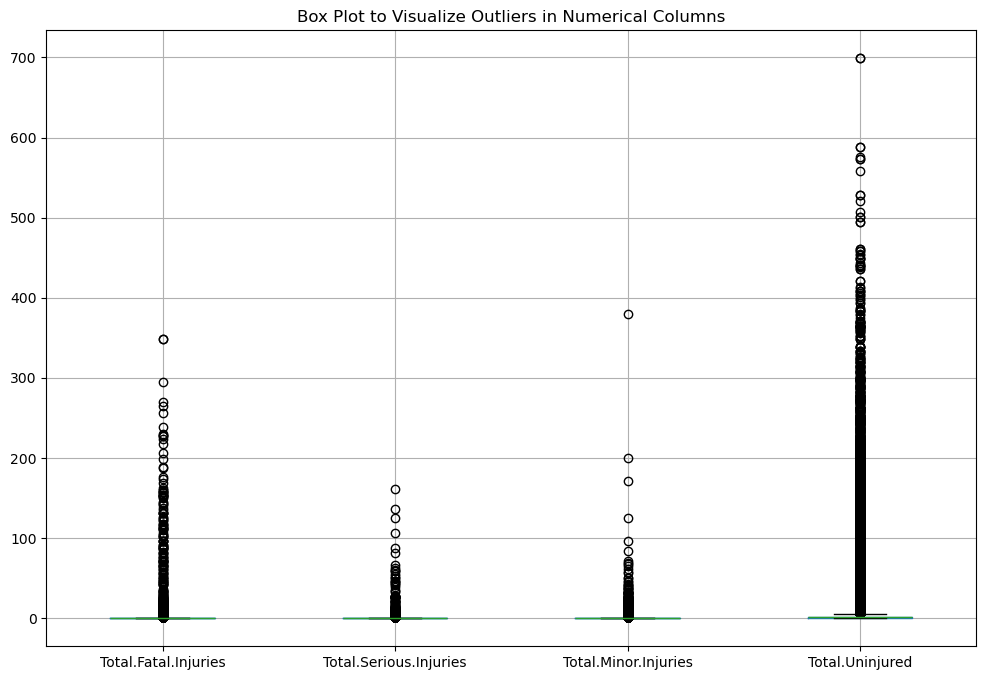

In [20]:
# Checking for outliers in the injury data that has been grouped as numerical_column
# Box plots will be used to visualize outliers
plt.figure(figsize=(12, 8))
filtered_aviation_row_df[numerical_columns].boxplot()
plt.title('Box Plot to Visualize Outliers in Numerical Columns')
plt.show()

In [21]:
# Calculating and displaying the accident rates per aircrfat model

# Compute the number of accidents for each Make
accident_per_make = filtered_aviation_row_df['Make']. value_counts().reset_index()
accident_per_make.columns = ['Make','Accident Count']
print(accident_per_make)
# Compute the number of accidents for each model
accident_per_model = filtered_aviation_row_df['Model']. value_counts().reset_index()
accident_per_model.columns = ['Model','Accident Count']
print(accident_per_model)

                 Make  Accident Count
0              Cessna           22227
1               Piper           12029
2              CESSNA            4922
3               Beech            4330
4               PIPER            2841
...               ...             ...
8232  Leonard Walters               1
8233   Maule Air Inc.               1
8234      Motley Vans               1
8235          Perlick               1
8236    ROYSE RALPH L               1

[8237 rows x 2 columns]
               Model  Accident Count
0                152            2367
1                172            1756
2               172N            1164
3          PA-28-140             932
4                150             829
...              ...             ...
12313         GC-1-A               1
12314        737-3S3               1
12315   MBB-BK117-B2               1
12316  GLASSAIR GL25               1
12317      M-8 EAGLE               1

[12318 rows x 2 columns]


In [22]:
# Bar plots for categorical columns

# Ensure Matplotlib inline
%matplotlib inline

filtered_aviation_row_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Use DejaVu Sans font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Function to clean column names or any string data
def clean_string(s):
    return ''.join(e for e in s if e.isalnum() or e.isspace())
    
# Define the categorical columns you want to plot
categorical_columns_to_plot = ['Aircraft.damage']
#categorical_columns_to_plot = ['Aircraft.damage', 'Make', 'Model']

# Apply the cleaning function to the categorical columns
for col in categorical_columns_to_plot:
    filtered_aviation_row_df[col] = filtered_aviation_row_df[col].apply(clean_string)


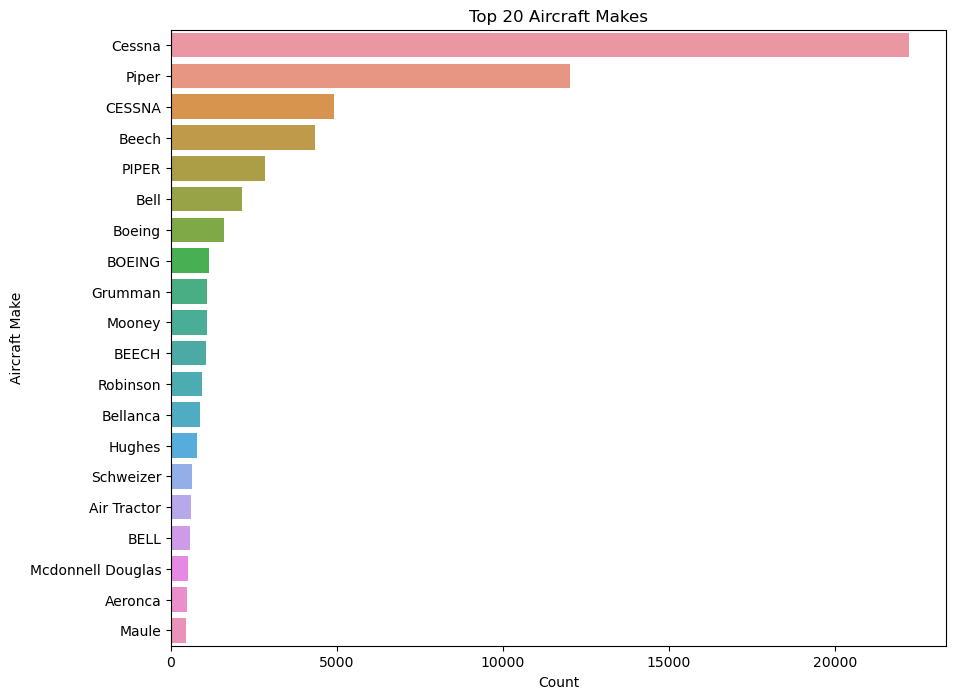

In [23]:
# Top N Aircraft Makes
top_n = 20

top_makes = filtered_aviation_row_df['Make'].value_counts().head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_makes.index, x=top_makes.values)
plt.title(f'Top {top_n} Aircraft Makes')
plt.xlabel('Count')
plt.ylabel('Aircraft Make')
plt.show()

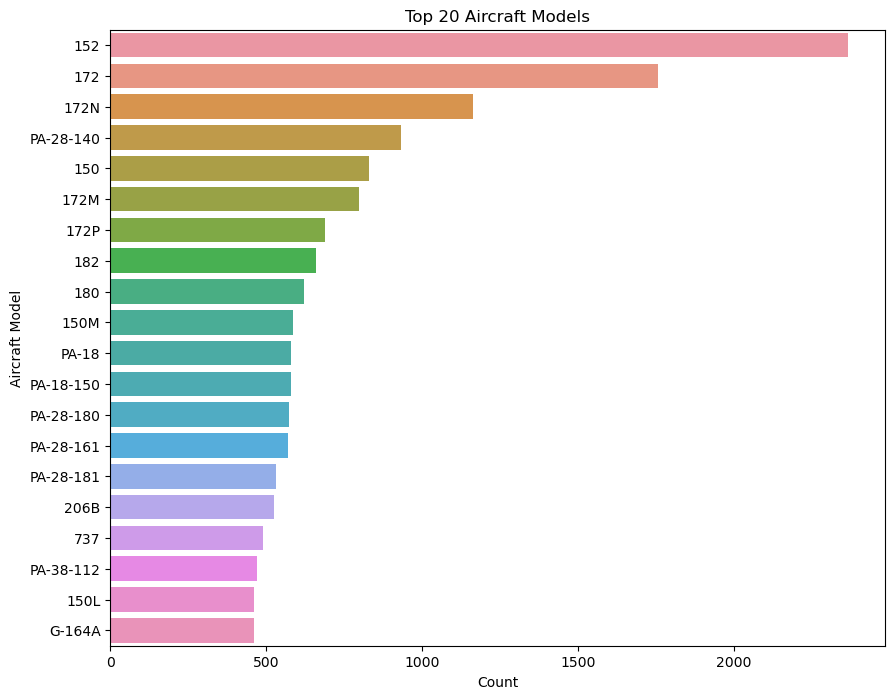

In [24]:
# Top N Aircraft Models
top_models = filtered_aviation_row_df['Model'].value_counts().head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_models.index, x=top_models.values)
plt.title(f'Top {top_n} Aircraft Models')
plt.xlabel('Count')
plt.ylabel('Aircraft Model')
plt.show()

No outliers were noted in the data.

In [25]:
# Display summary statistics for numerical columns
summary_stats = filtered_aviation_row_df[numerical_columns].describe()
print("Summary Statistics for Numerical Variables:")
print(summary_stats)

Summary Statistics for Numerical Variables:
       Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
count          88888.000000            88888.000000          88888.000000   
mean               0.564767                0.240494              0.309131   
std                5.126677                1.434622              2.083726   
min                0.000000                0.000000              0.000000   
25%                0.000000                0.000000              0.000000   
50%                0.000000                0.000000              0.000000   
75%                0.000000                0.000000              0.000000   
max              349.000000              161.000000            380.000000   

       Total.Uninjured  
count     88888.000000  
mean          4.971301  
std          27.002158  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           2.000000  
max         699.000000  


In [26]:
# Checking for Anomalies
# No anomalies were noted

In [27]:
# More Data Cleaning Procedures
# Replaced infinite values with NaN

## 6. Exploratory Analysis

In [28]:
# Ploting the bivariate summaries and recording our observations

Checking Aircraft model against Aircraft Damage

<Figure size 1500x1000 with 0 Axes>

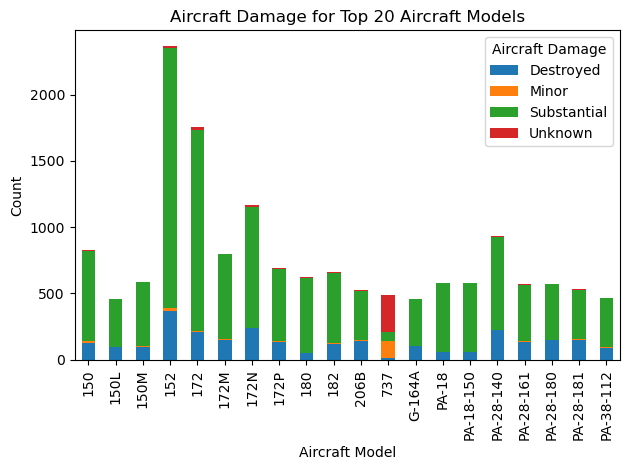

In [29]:
# Identify the top 20 aircraft models
top_models = filtered_aviation_row_df['Model'].value_counts().head(20).index

# Filter the filtered dataframe to include only the top 20 models
top_models_df = filtered_aviation_row_df[filtered_aviation_row_df['Model'].isin(top_models)]

# Create a pivot table to count occurrences of each type of damage for the top 20 models
model_damage_counts = top_models_df.pivot_table(index='Model', columns='Aircraft.damage', aggfunc='size', fill_value=0)

# Plotting the grouped data
plt.figure(figsize=(15, 10))
model_damage_counts.plot(kind='bar', stacked=True)
plt.title('Aircraft Damage for Top 20 Aircraft Models')
plt.xlabel('Aircraft Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Damage')
plt.tight_layout()
plt.show()

Generally most of the aircraft models get substantially damaged or destroyed. Model 152 has high number of accidents with the aircarft being substantially damaged or destroyed

Checking Aircraft make against Aircraft Damage

<Figure size 1500x1000 with 0 Axes>

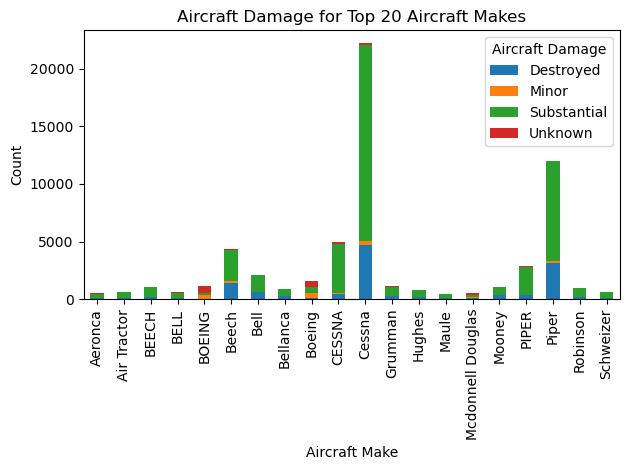

In [30]:
# Identify the top 20 aircraft makes
top_makes = filtered_aviation_row_df['Make'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 makes
top_makes_df = filtered_aviation_row_df[filtered_aviation_row_df['Make'].isin(top_makes)]

# Create a pivot table to count occurrences of each type of damage for the top 20 makes
make_damage_counts = top_makes_df.pivot_table(index='Make', columns='Aircraft.damage', aggfunc='size', fill_value=0)

# Plotting the grouped data
plt.figure(figsize=(15, 10))
make_damage_counts.plot(kind='bar', stacked=True)
plt.title('Aircraft Damage for Top 20 Aircraft Makes')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Damage')
plt.tight_layout()
plt.show()

Relationship between the top 20 aircraft makes and the top 20 injury severity categories

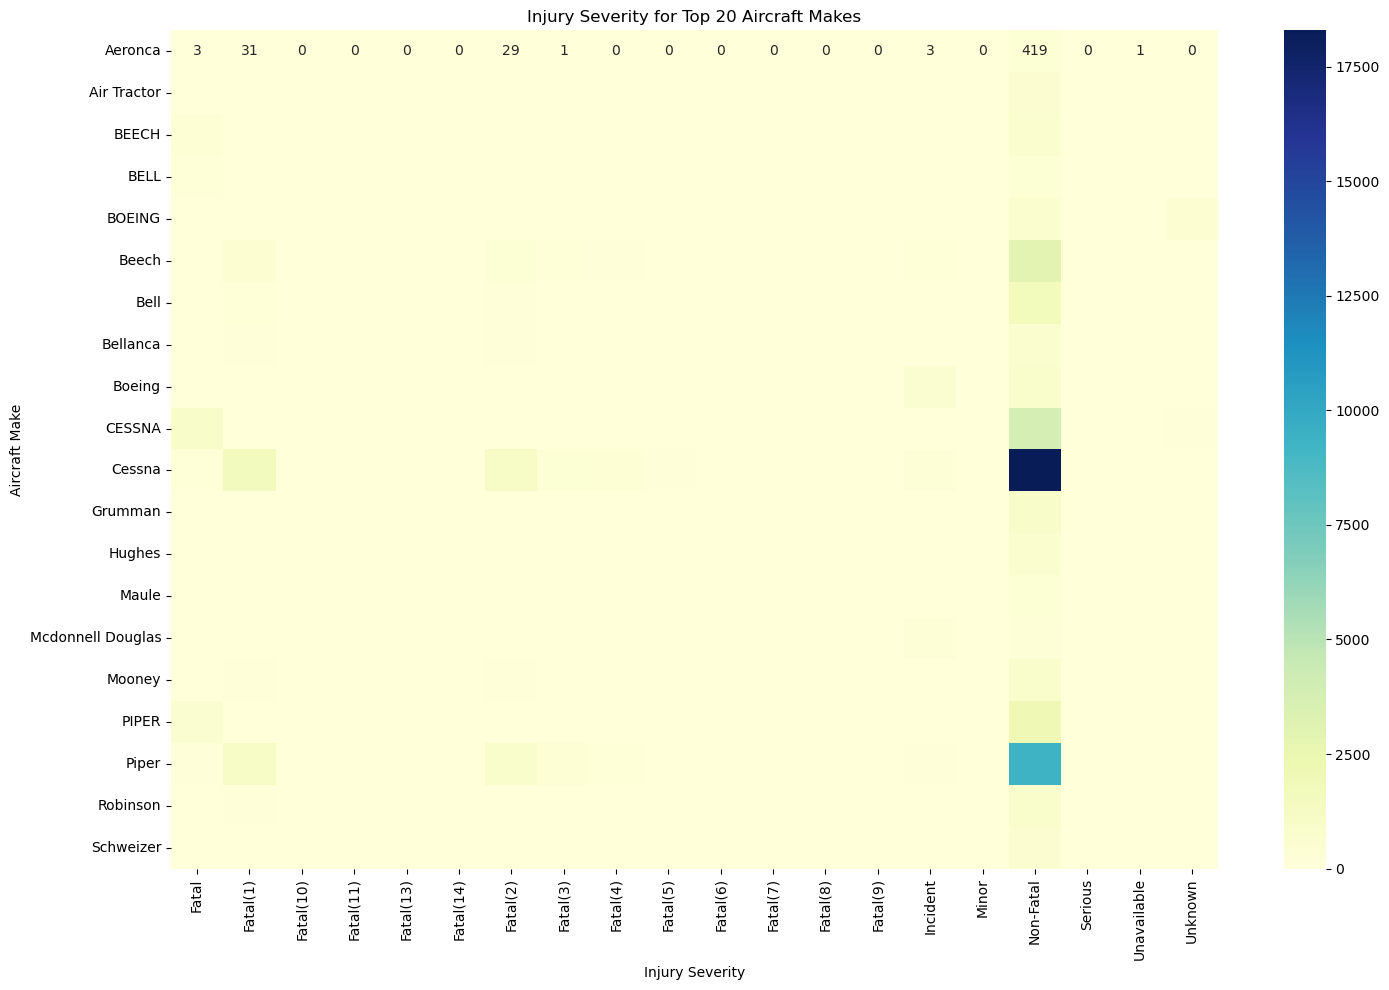

In [31]:
# Identify the top 20 injury severity categories
top_injury_severity = filtered_aviation_row_df['Injury.Severity'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 makes and top 20 injury severity categories
filtered_df = filtered_aviation_row_df[(filtered_aviation_row_df['Make'].isin(top_makes)) & (filtered_aviation_row_df['Injury.Severity'].isin(top_injury_severity))]

# Create a pivot table to count occurrences of each injury severity category for the top 20 makes
make_injury_counts = filtered_df.pivot_table(index='Make', columns='Injury.Severity', aggfunc='size', fill_value=0)

# Plotting the grouped data
plt.figure(figsize=(15, 10))
sns.heatmap(make_injury_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Injury Severity for Top 20 Aircraft Makes')
plt.xlabel('Injury Severity')
plt.ylabel('Aircraft Make')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Key Observations
1. CESSNA make has the highest counts in multiple injury severity categories, especially in "Fatal" and "Non-Fatal" categories. The high counts in these categories indicate that CESSNA aircraft are frequently involved in accidents with significant injuries
   
2. Most accidents are also non-fatal indicating a high number of non-fatal injuries.

Below is an analysis to help identify the high risk aircrafts makes and those that are comparatively safer based on injury severity data. To optimize the visual the number of makes shown in the heat map hs been limited to the top 10 with the highest counts in severe injuries and top 10 with the highest counts in.

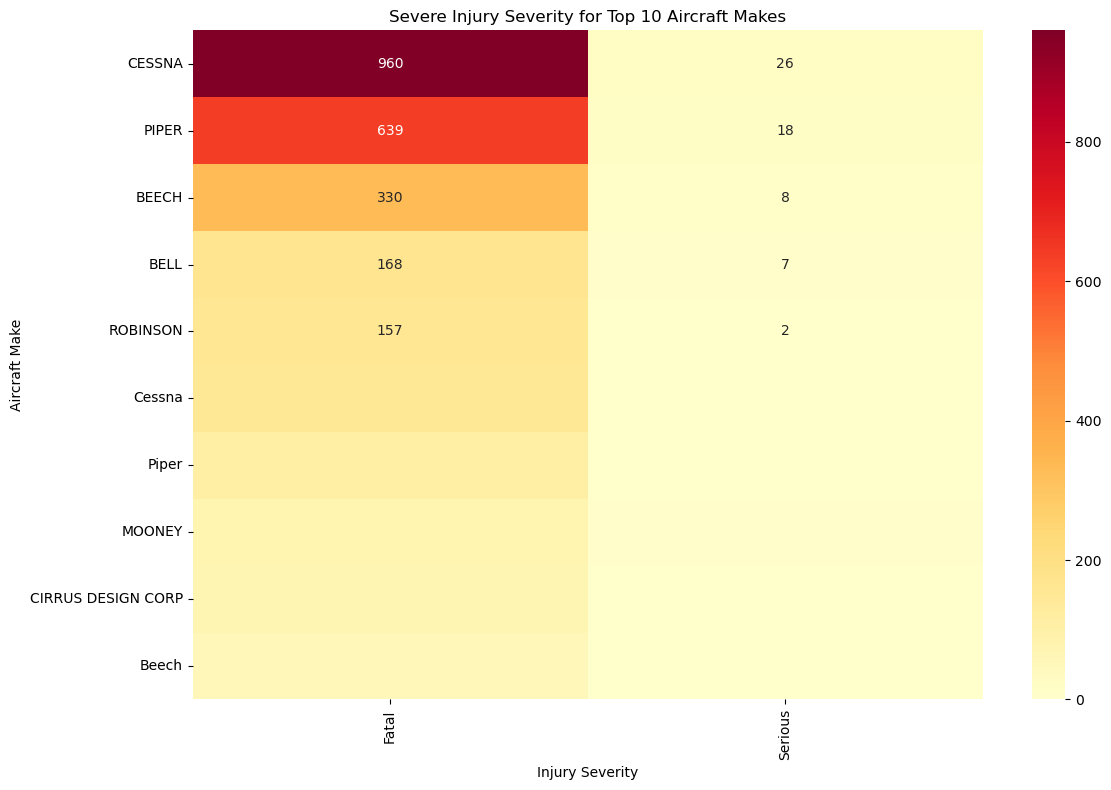

In [32]:

# Check unique values in 'Injury.Severity' column
unique_injury_severity = filtered_aviation_row_df['Injury.Severity'].unique()

# Define the actual injury severity categories present in the data
severe_injuries = ['Fatal', 'Serious']
minor_injuries = ['Minor', 'Non-Fatal']  # Adjust according to actual values

# Create a pivot table to count occurrences of each injury severity category for each aircraft make
make_injury_counts = filtered_aviation_row_df.pivot_table(index='Make', columns='Injury.Severity', aggfunc='size', fill_value=0)

# Sum the counts for severe and minor injuries
make_injury_counts['Severe'] = make_injury_counts[severe_injuries].sum(axis=1)
make_injury_counts['Minor'] = make_injury_counts[minor_injuries].sum(axis=1)

# Identify makes with the highest counts in severe injury categories
top_severe_injury_makes = make_injury_counts.sort_values(by='Severe', ascending=False).head(10)

# Identify makes with the highest counts in minor or no injuries
top_minor_injury_makes = make_injury_counts.sort_values(by='Minor', ascending=False).head(10)

# Filter the original pivot table for top makes
top_severe_injury_pivot = make_injury_counts.loc[top_severe_injury_makes.index, severe_injuries]
top_minor_injury_pivot = make_injury_counts.loc[top_minor_injury_makes.index, minor_injuries]

# Plotting the heatmap for severe injuries
plt.figure(figsize=(12, 8))
sns.heatmap(top_severe_injury_pivot, annot=True, fmt="d", cmap="YlOrRd")
plt.title('Severe Injury Severity for Top 10 Aircraft Makes')
plt.xlabel('Injury Severity')
plt.ylabel('Aircraft Make')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



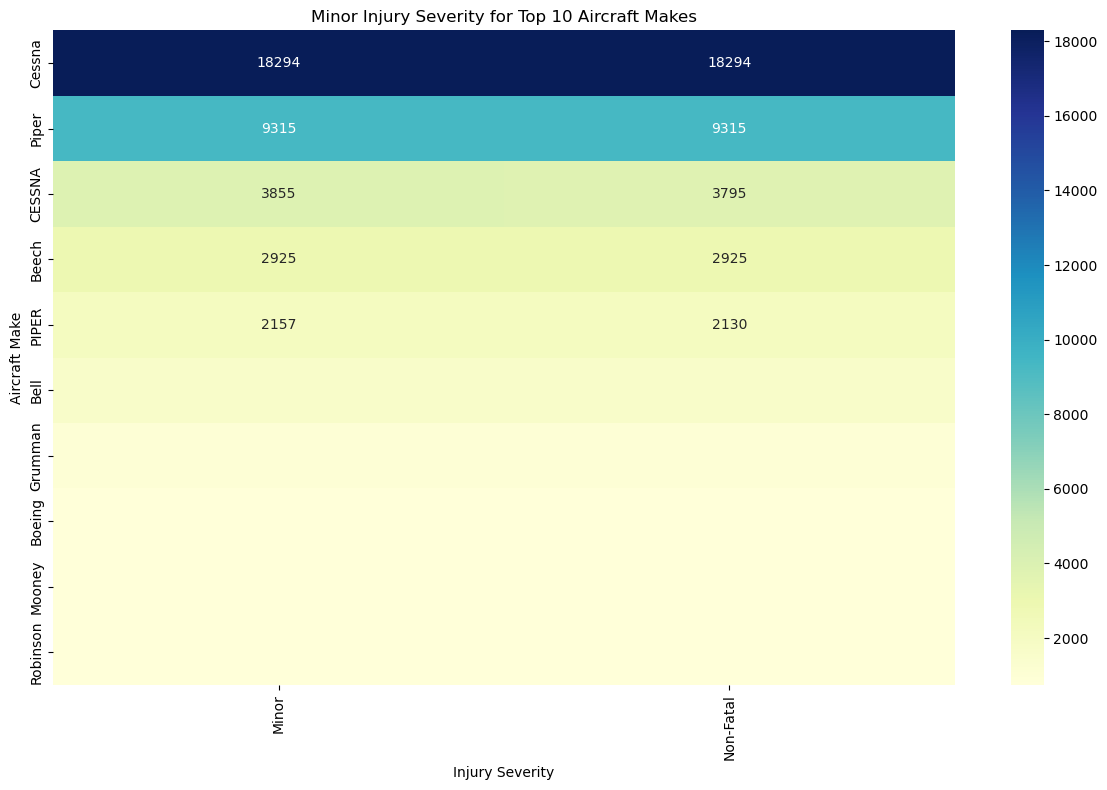

In [33]:
# Plotting the heatmap for minor injuries
plt.figure(figsize=(12, 8))
sns.heatmap(top_minor_injury_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Minor Injury Severity for Top 10 Aircraft Makes')
plt.xlabel('Injury Severity')
plt.ylabel('Aircraft Make')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The Cessna and Piper aircraft makes have the highest number of accidents but a high percentge results in minor injury severity. 

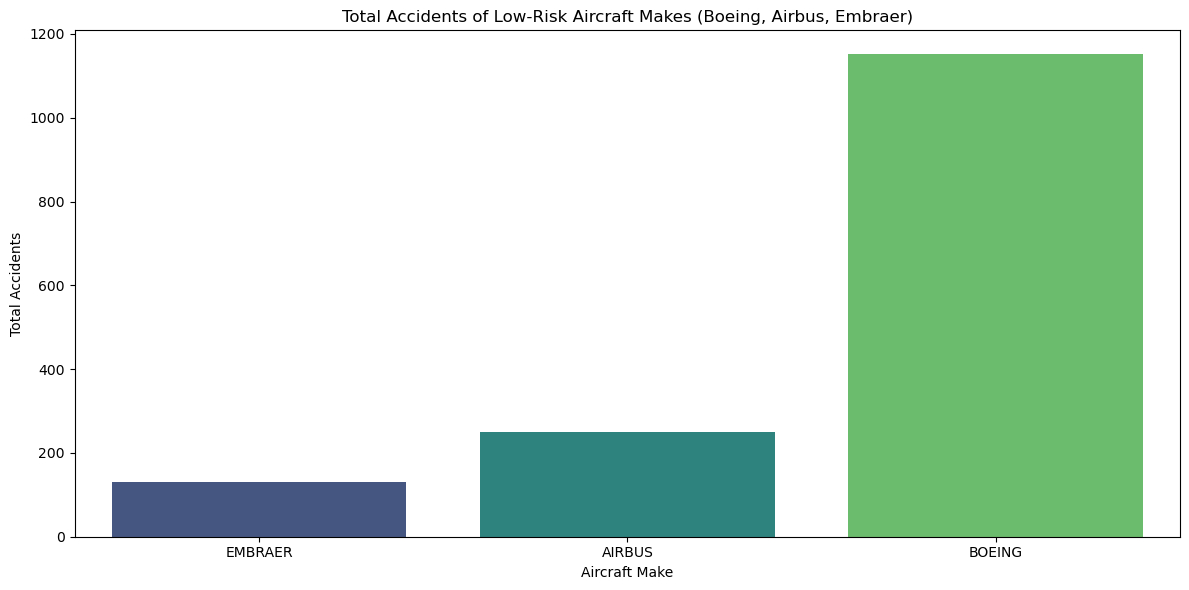

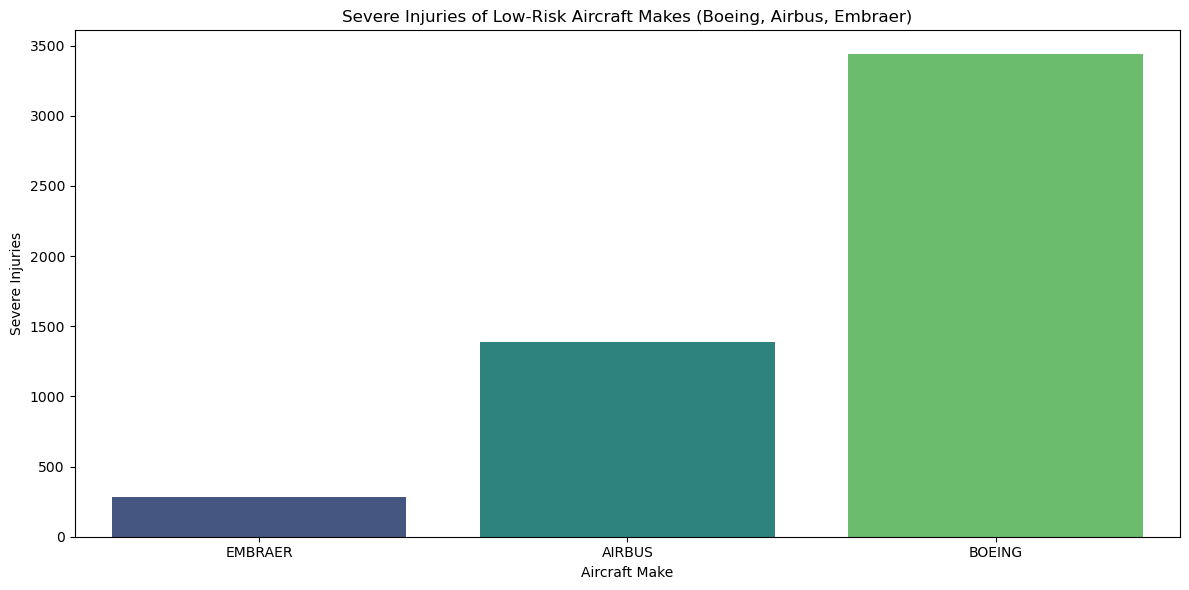

In [34]:
# Checking specific aircrafts makes- Boeing, Airbus and Embraer as these are commonly used flights for passengers
# Filter the dataset for Boeing, Airbus, and Embraer
filtered_df = filtered_aviation_row_df[filtered_aviation_row_df['Make'].isin(['BOEING', 'AIRBUS', 'EMBRAER'])]

# Calculate the number of accidents for each make
accident_counts = filtered_df.groupby('Make').size().reset_index(name='Total Accidents')

# Calculate the total severe injuries for each make
severe_injuries = filtered_df.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().reset_index()

# Merge the dataframes
risk_df = pd.merge(accident_counts, severe_injuries, on='Make')

# Calculate total severe injuries
risk_df['Severe Injuries'] = risk_df['Total.Fatal.Injuries'] + risk_df['Total.Serious.Injuries']

# Sort by total accidents and severe injuries to identify low-risk makes
risk_df = risk_df.sort_values(by=['Total Accidents', 'Severe Injuries'])

# Set up the matplotlib figure for Total Accidents
plt.figure(figsize=(12, 6))

# Create a bar plot for Total Accidents
sns.barplot(x='Make', y='Total Accidents', data=risk_df, palette='viridis')
plt.title('Total Accidents of Low-Risk Aircraft Makes (Boeing, Airbus, Embraer)')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.show()

# Set up the matplotlib figure for Severe Injuries
plt.figure(figsize=(12, 6))

# Create a bar plot for Severe Injuries
sns.barplot(x='Make', y='Severe Injuries', data=risk_df, palette='viridis')
plt.title('Severe Injuries of Low-Risk Aircraft Makes (Boeing, Airbus, Embraer)')
plt.xlabel('Aircraft Make')
plt.ylabel('Severe Injuries')
plt.tight_layout()
plt.show()


#### Data Reduction
This is a vital process in data preprocessing, especially when handling large datasets. By reducing the volume of data while preserving its essential characteristics, data reduction techniques enhance the efficiency, effectiveness, and interpretability of data analysis and machine learning task

For this analysis columns with more than 60% of missing values were dropped.

## 7. Implementing the Solution

The analysis focused on the aircraft make and model, assessing the frequency of accidents and the extent of injuries to passengers and crew. The observations and recommendations are summarized below:

###### Key Observations
High-Risk Aircraft Makes and Models:

Cessna Make Models: The analysis reveals that certain aircraft makes under the Cessna brand, particularly the Cessna 152 model, have a high incidence of accidents that result in serious aircraft damage, fatalities, and serious injuries.

Low-Risk Aircraft Makes and Models:
Aircraft with a higher proportion of minor or no injuries are considered lower risk and are potential candidates for future purchases. These include Boeing, Embraer and Airbus

Recommendations
###### Investigate High-Risk Models:

Safety Audit: Conduct a detailed safety audit on the high risk models.
Operational Review: Examine operational protocols, maintenance records, and other factors that could affect these models. There is need to look at more data such as that has total flight hours, manufacturers safety records in order to make a more informed decision.


###### Prioritize Low-Risk Aircraft:

Purchase Considerations: Prioritize aircraft with lower accident rates and injury severities for future purchases.

## 8. Challenging the Solution

1. The conclusions drawn about the high-risk models might be influenced by random variability in the data. There is need to perform statistical tests to determine if the observed differences in accident counts and injury severities between aircraft makes and models are statistically significant.

2. Factors such as the operational environment, pilot experience, and maintenance practices might influence the accident rates and severity, and these are not accounted for in the analysis. Consider additional contextual variables in the analysis. For example, analyze the impact of pilot hours, weather conditions, and maintenance schedules on the accidents for different makes and models.

3. Focusing on aircraft make and model might overlook other critical risk factors such as specific flight routes or aircraft age, Consider broadening the scope of analysis to include these additional risk factors and assess their impact on safety.

   

## 9. Follow up Questions

### a). Did we have the right data?
1. The missing values, duplicates and inconsistencies may have impacted the analysis.
2. Additional data on flight hours is crutial in determining accurte accident rates. This data was not available during the analysis
3. Additional data sets can be considered e.g total flight hours for each aircraft over the same period, airfcraft maitainace records, pilot and crew data such as experience and training
### b). Do we need other data to answer our question?
Additional data on factors such as pilot experience, maintenance records, and flight routes could provide deeper insights.
### c). Did we have the right question?
The questions were derived based on the data set provided. It is howerver critical to compute the accident rates for the aircraft model by incorporating additional data on total flight hours per aircraft make and model